# Processing TESS sector 8 data for TOI4504

In [2]:
%matplotlib inline
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
path = '../research/star_systems/TOI-4504/lightkurve/'

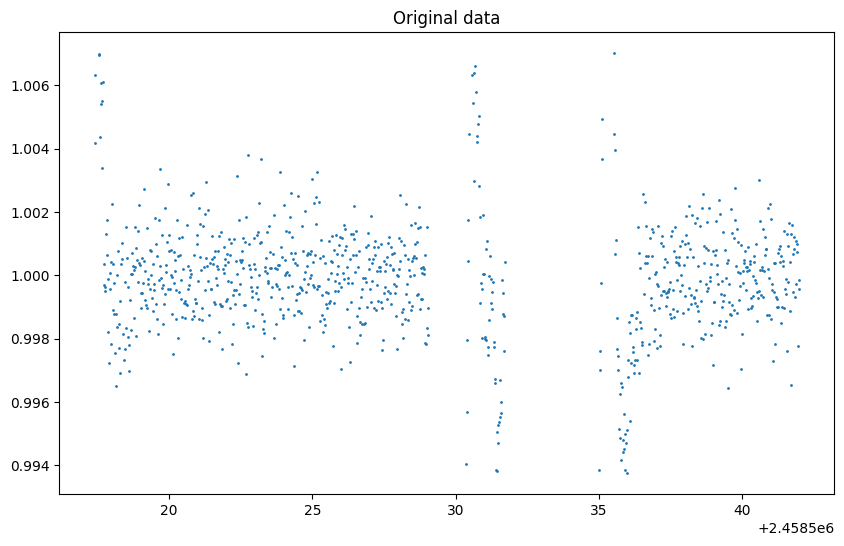

,time,flux,flux_err
0,2.458517e+06,1.004190,NaN
1,2.458517e+06,1.006342,NaN
2,2.458518e+06,1.007002,NaN
3,2.458518e+06,1.006951,NaN
4,2.458518e+06,1.004367,NaN
...,...,...,...
922,2.458542e+06,1.000728,NaN
923,2.458542e+06,1.000978,NaN
924,2.458542e+06,0.997759,NaN
925,2.458542e+06,0.999851,NaN


In [3]:
full_path = path+"8/8_TGLC_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

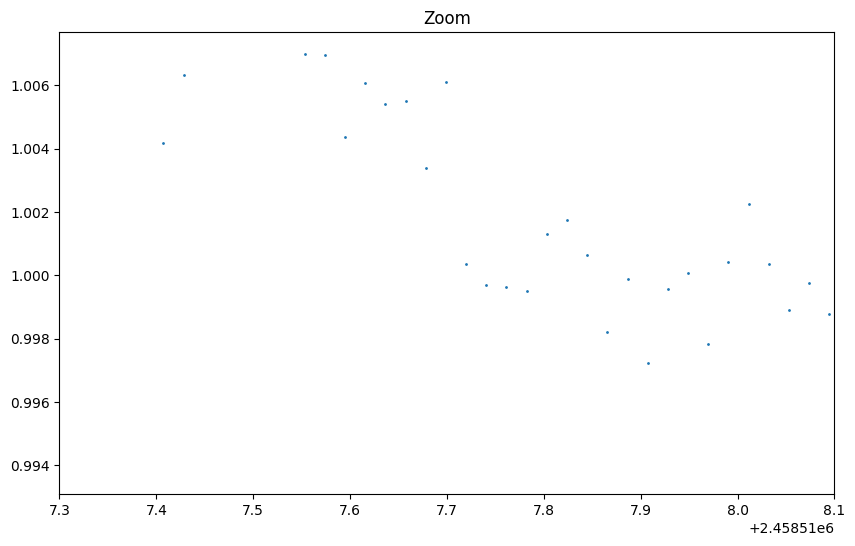

In [3]:
plot_this(df.time, [df.flux], ["flux"], title="Zoom", left=2458517.3, right=2458518.1)

In [4]:
df = remove_from_df(df, 2458517.3, 2458517.7)

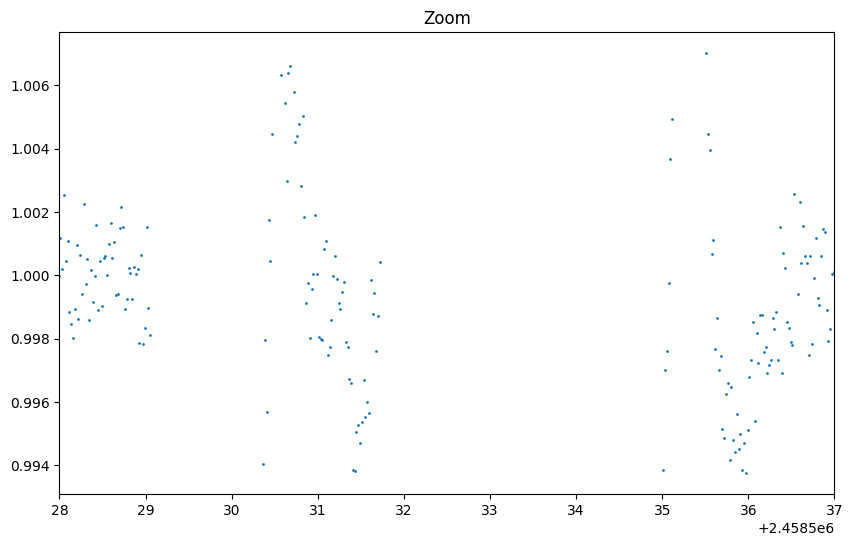

In [5]:
plot_this(df.time, [df.flux], ["flux"], title="Zoom", left=2458528, right=2458537)

In [6]:
df = calculate_flux_err(df, window_length=101)
df

C:\Users\ulsc\OneDrive - AspIT - Ondrive\Uli\Python\curvesim\process_TESS_data\process_flux_data.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flux_err'] = flux_err


,time,flux,flux_err
10,2.458518e+06,1.000344,0.001372
11,2.458518e+06,0.999677,0.001393
12,2.458518e+06,0.999631,0.001385
13,2.458518e+06,0.999514,0.001383
14,2.458518e+06,1.001289,0.001385
...,...,...,...
922,2.458542e+06,1.000728,0.001242
923,2.458542e+06,1.000978,0.001243
924,2.458542e+06,0.997759,0.001217
925,2.458542e+06,0.999851,0.001229


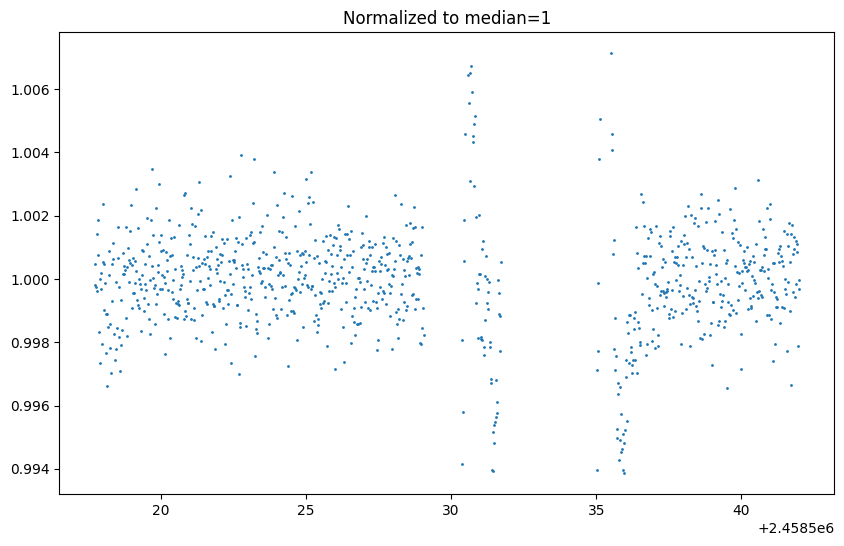

,time,flux,flux_err
10,2.458518e+06,1.000463,0.001372
11,2.458518e+06,0.999795,0.001393
12,2.458518e+06,0.999750,0.001385
13,2.458518e+06,0.999633,0.001383
14,2.458518e+06,1.001407,0.001385
...,...,...,...
922,2.458542e+06,1.000847,0.001242
923,2.458542e+06,1.001097,0.001243
924,2.458542e+06,0.997877,0.001218
925,2.458542e+06,0.999970,0.001229


In [7]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [8]:
df2csv(df, full_path[:-4]+"_p.csv")